In [1]:
!pip install Sastrawi
!pip install wordcloud
!pip install google-play-scraper

import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Mizard\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mizard\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Library

In [2]:
from google_play_scraper import Sort, reviews
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

Scraping

1. Ulasan Livin

In [3]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'id.bmri.livin'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=5000
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_livin.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
print(df[['userName', 'content', 'score']].head(10))

          userName                                            content  score
0  Pengguna Google                                                hyi      1
1  Pengguna Google                           potongan bulannya banyak      1
2  Pengguna Google  ini kenapa saya malah jadi gk bisa login ke li...      2
3  Pengguna Google  benci menggunakan living mandiri ribet banget ...      2
4  Pengguna Google  tolong dibenahi apknya,,hari2 ni setiap kalau ...      5
5  Pengguna Google  padahal sering update aplikasi biar dapet vers...      1
6  Pengguna Google  kenapa akun saya tiba tiba tidak bisa masuk, k...      3
7  Pengguna Google  INI JARINGAN SAYA BAGUS YA UDAH 5G TAPI KENAPA...      1
8  Pengguna Google  kenapa di hp saya selalu muncul matikan share ...      3
9  Pengguna Google  apalah livin tidak bisa login, tombol login ga...      1


2. Ulasan MyBCA

In [4]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'com.bca.mybca.omni.android'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',      # Menentukan bahasa ulasan: Indonesia
    country='id',   # Menentukan region toko: Indonesia
    sort=Sort.NEWEST,
    count=5000       # Jumlah ulasan yang ingin diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_mybca.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
display(df[['userName', 'content', 'score']].head(10))

,userName,content,score
0,Pengguna Google,ribet,1
1,Pengguna Google,sangat membanru,5
2,Pengguna Google,Kenapa di My BCA tidak ada menu pembayaran pin...,5
3,Pengguna Google,mantap,4
4,Pengguna Google,bca uang gua abis 50 ribu loe,1
5,Pengguna Google,sangat bagus,5
6,Pengguna Google,Bintang Lima saya suka,5
7,Pengguna Google,gajian nya mulai kapan min? kok gak ada notifi...,5
8,Pengguna Google,saya kasi tau aja buat pedagang kecil jangan m...,1
9,Pengguna Google,update mulu bngst,1


3. Ulasan BCA Mobile

In [5]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'com.bca'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',      # Menentukan bahasa ulasan: Indonesia
    country='id',   # Menentukan region toko: Indonesia
    sort=Sort.NEWEST,
    count=5000       # Jumlah ulasan yang ingin diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_bca.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
display(df[['userName', 'content', 'score']].head(10))

,userName,content,score
0,Pengguna Google,sinyal bagus tapi koneksi terputus terus sampa...,1
1,Pengguna Google,mudah di cermati,5
2,Pengguna Google,haduh indikator lampu saya kok merah terus ya ...,3
3,Pengguna Google,"gimana sih, pas mau bayar gabisa di buka! moho...",1
4,Pengguna Google,BCA mobile sangat membantu,5
5,Pengguna Google,"knapa kok indikator lampu merah,padahal sinyal...",1
6,Pengguna Google,mengapa ketika saya mendapatkan transfer selal...,2
7,Pengguna Google,Setiap buka Qris lama banget cameranya tidak m...,5
8,Pengguna Google,ok,5
9,Pengguna Google,update terus,1


4. Ulasan BNI

In [6]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'src.com.bni'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',      # Menentukan bahasa ulasan: Indonesia
    country='id',   # Menentukan region toko: Indonesia
    sort=Sort.NEWEST,
    count=5000       # Jumlah ulasan yang ingin diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_bnimobile.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
display(df[['userName', 'content', 'score']].head(10))

,userName,content,score
0,Pengguna Google,Saya menarik uang menggunakan fitur mobile tun...,1
1,Pengguna Google,lancar transaksinyaa,5
2,Pengguna Google,knapa ya apk BNI mobil banking pendaptaran kar...,5
3,Pengguna Google,lemot banget aplikasinya... pake provider byu ...,1
4,Pengguna Google,"kenapa BNI ga call no sy SJ, pake ganggu no ko...",1
5,Pengguna Google,kenapa saldo saya belum masuk kak padahal saya...,2
6,Pengguna Google,"ini gimana ya kok ganguan terus, mau fi pakai ...",3
7,Pengguna Google,"susah , kadang buat malu, mau bayar buka mbang...",1
8,Pengguna Google,lumayan lah,5
9,Pengguna Google,"makin lama makin GK karuan,",1


5. Ulasan BNI Wondr

In [7]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'id.bni.wondr'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',      # Menentukan bahasa ulasan: Indonesia
    country='id',   # Menentukan region toko: Indonesia
    sort=Sort.NEWEST,
    count=5000       # Jumlah ulasan yang ingin diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_bniwondr.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
display(df[['userName', 'content', 'score']].head(10))

,userName,content,score
0,Pengguna Google,sering error,2
1,Pengguna Google,memudahkan untuk segala hal,5
2,Pengguna Google,Baik sekali,5
3,Pengguna Google,trima kasj sekali,5
4,Pengguna Google,kendala TDK dapat masuk/login wondr mnta bantu...,3
5,Pengguna Google,mantap,5
6,Pengguna Google,aplikasi jelek bnyk potongan tanpa pemberitahu...,1
7,Pengguna Google,baik,5
8,Pengguna Google,👍,5
9,Pengguna Google,"jaringan bagus, buka apk mandiri BRI BCA dll b...",1


6. Ulasan BRIMO

In [8]:
from google_play_scraper import Sort, reviews
import pandas as pd

# ID aplikasi
app_id = 'id.co.bri.brimo'

# Mengambil ulasan bahasa Indonesia
result, _ = reviews(
    app_id,
    lang='id',      # Menentukan bahasa ulasan: Indonesia
    country='id',   # Menentukan region toko: Indonesia
    sort=Sort.NEWEST,
    count=5000       # Jumlah ulasan yang ingin diambil
)

# Konversi ke DataFrame
df = pd.DataFrame(result)
df.to_csv('ulasan_brimo.csv', index=False)

# Menampilkan 5 data teratas untuk pengecekan
display(df[['userName', 'content', 'score']].head(10))

,userName,content,score
0,Pengguna Google,ternyata saya juga kena bugs layar putih ketik...,1
1,Pengguna Google,"wah parah si saya top up dana dari brimo, tran...",2
2,Pengguna Google,sangat memudahkan dalam segala hal urusan keua...,5
3,Pengguna Google,"sudah redownload, aplikasi ngewhite lagi, ampu...",1
4,Pengguna Google,BRI mo di hp saya mengalami kendala tidak bisa...,5
5,Pengguna Google,mantap ❤️❤️❤️❤️❤️,5
6,Pengguna Google,"aplikasinya bagus sangat membantu tapi akhir"" ...",5
7,Pengguna Google,"Bagus sangat membantu,Tapi akhir2 ini nyebelin...",5
8,Pengguna Google,dengan BRImo semuanya jadi mudah terimakasih,5
9,Pengguna Google,lebih mudah bertransaksi make brimo,5


A. Read Dataset

In [9]:
livin = pd.read_csv('ulasan_livin.csv')
bca = pd.read_csv('ulasan_bca.csv')
mybca = pd.read_csv('ulasan_mybca.csv')
bnimobile = pd.read_csv('ulasan_bnimobile.csv')
bniwondr = pd.read_csv('ulasan_bniwondr.csv')
brimo = pd.read_csv('ulasan_brimo.csv')

B. EDA

In [10]:
livin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  3951 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          4935 non-null   object
 9   repliedAt             4935 non-null   object
 10  appVersion            3951 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [11]:
bca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  4011 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          5000 non-null   object
 9   repliedAt             5000 non-null   object
 10  appVersion            4011 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [12]:
mybca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  3988 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          5000 non-null   object
 9   repliedAt             5000 non-null   object
 10  appVersion            3988 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [13]:
bnimobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  3836 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          2612 non-null   object
 9   repliedAt             2612 non-null   object
 10  appVersion            3836 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [14]:
bniwondr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  4552 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          1753 non-null   object
 9   repliedAt             1753 non-null   object
 10  appVersion            4552 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [15]:
brimo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  4109 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          4959 non-null   object
 9   repliedAt             4959 non-null   object
 10  appVersion            4109 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


Prosessing

In [16]:
# List of files
files = {
    "BCA Mobile": "ulasan_bca.csv",
    "BNI Mobile": "ulasan_bnimobile.csv",
    "Wondr by BNI": "ulasan_bniwondr.csv",
    "BRIMO": "ulasan_brimo.csv",
    "Livin Mandiri": "ulasan_livin.csv",
    "myBCA": "ulasan_mybca.csv"
}

# Load datasets
dfs = {}
for name, path in files.items():
    try:
        dfs[name] = pd.read_csv(path)
        # Add a column to identify the app
        dfs[name]['App'] = name
    except Exception as e:
        print(f"Error loading {name}: {e}")

C:\Users\Mizard\AppData\Local\Temp\ipykernel_14012\3187575436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


--- Temuan Awal Data (Head & Info) ---

APP: BCA Mobile
Columns: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion', 'App']
Total Rows: 5000
Sample Content:
['sinyal bagus tapi koneksi terputus terus sampai saya copot aplikasi ini terus pasang lagi padahal tiap update langsung saya update tp malah sering error terus pdhl udh pake bca 10 tahun lbh tp kalau error² terus bikin males'
 'mudah di cermati'
 'haduh indikator lampu saya kok merah terus ya ? apa lagi ada perbaikan atau gimana ya🙂\u200d↕️'
 'gimana sih, pas mau bayar gabisa di buka! mohon menunggu > koneksi terputus > padahal koneksi bagus lagi telponan dengan klien'
 'BCA mobile sangat membantu']
Duplicated Reviews: 554
Null Content: 0

APP: BNI Mobile
Columns: ['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion', 'App']
Total Rows: 5000
Sam

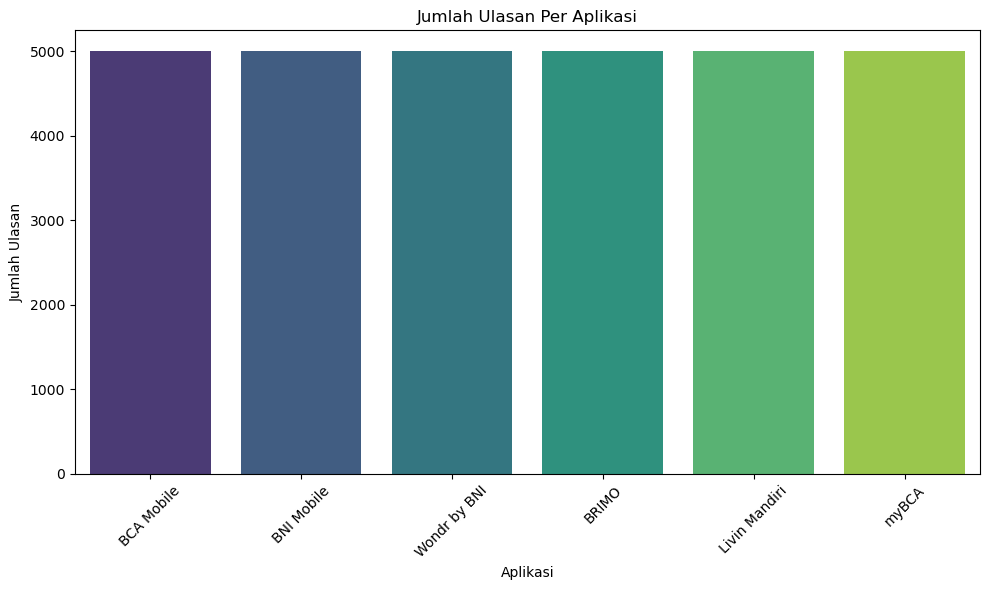

In [17]:
# 1. Visualization of Review Counts (Raw Data)
plt.figure(figsize=(10, 6))
counts = {name: len(df) for name, df in dfs.items()}
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Jumlah Ulasan Per Aplikasi")
plt.ylabel("Jumlah Ulasan")
plt.xlabel("Aplikasi")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("step1_raw_counts.png")

# 2. Findings before preprocessing (Quick inspection)
print("--- Temuan Awal Data (Head & Info) ---")
for name, df in dfs.items():
    print(f"\nAPP: {name}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Total Rows: {len(df)}")
    print("Sample Content:")
    print(df['content'].head().values)

    # Check for duplicates
    dupes = df.duplicated(subset=['content', 'userName']).sum()
    print(f"Duplicated Reviews: {dupes}")

    # Check for nulls in content
    nulls = df['content'].isnull().sum()
    print(f"Null Content: {nulls}")

--- Jumlah Data Setelah Hapus Duplikat ---
BCA Mobile: 4446
BNI Mobile: 4285
Wondr by BNI: 3447
BRIMO: 3961
Livin Mandiri: 4301
myBCA: 4300


C:\Users\Mizard\AppData\Local\Temp\ipykernel_14012\2452462724.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keys, y=vals, palette='Greens_r')


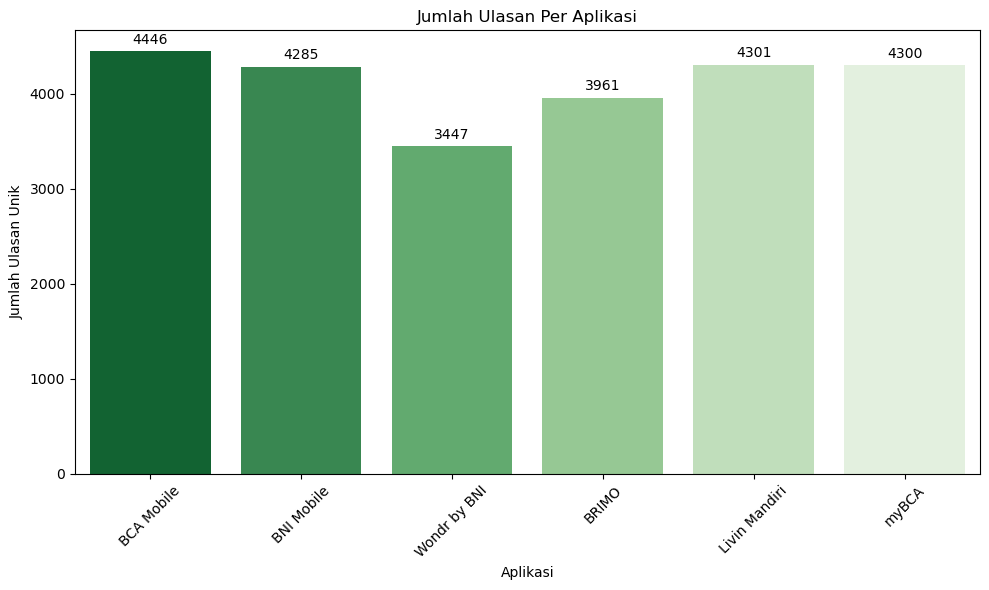

In [18]:
clean_counts = {}

# Proses Hapus Duplikat
print("--- Jumlah Data Setelah Hapus Duplikat ---")
for name, path in files.items():
    try:
        # 1. Load Data
        df = pd.read_csv(path)

        # 2. Hapus Duplikat berdasarkan kolom 'content' dan 'userName'
        # keep='first' artinya menyimpan data pertama yang ditemukan, sisanya dihapus
        df_clean = df.drop_duplicates(subset=['content', 'userName'], keep='first')

        # Simpan jumlah data bersih
        clean_counts[name] = len(df_clean)
        print(f"{name}: {len(df_clean)}")

    except Exception as e:
        print(f"Error processing {name}: {e}")

# 3. Visualisasi Data Bersih
plt.figure(figsize=(10, 6))
keys = list(clean_counts.keys())
vals = list(clean_counts.values())

sns.barplot(x=keys, y=vals, palette='Greens_r')
plt.title("Jumlah Ulasan Per Aplikasi")
plt.ylabel("Jumlah Ulasan Unik")
plt.xlabel("Aplikasi")
plt.xticks(rotation=45)

# Menambahkan label angka di atas batang
for i, v in enumerate(vals):
    plt.text(i, v + 50, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

C. Preprocessing

In [19]:
# --- 1. Preprocessing Setup ---

# Stopwords (Manual list as we can't download NLTK data)
stopwords_id = set([
    "yang", "dan", "di", "ke", "dari", "ini", "itu", "untuk", "pada", "adalah",
    "sebagai", "dengan", "juga", "karena", "tapi", "tetapi", "namun", "akan",
    "bisa", "ada", "tidak", "sudah", "saya", "kami", "kita", "kamu", "dia",
    "mereka", "anda", "aku", "lagi", "mau", "masih", "apa", "kenapa", "gimana",
    "saja", "kalau", "kalo", "biar", "kok", "mah", "dong", "sih", "nya",
    "bgt", "gak", "gk", "ga", "tp", "yg", "dgn", "sdh", "aja", "sy", "ma",
    "klo", "udh", "udah", "blm", "belum", "bkn", "bukan", "dr", "kl", "jd",
    "jdi", "kpn", "kapan", "krn", "msh", "msih", "sm", "sama", "utk", "untk",
    "dg", "dengn", "tuh", "deh", "kan", "lah", "pun", "kah"
])

# Slang Dictionary (Mini)
slang_dict = {
    "gk": "tidak", "ga": "tidak", "gak": "tidak", "nggak": "tidak",
    "sy": "saya", "aq": "aku", "ak": "aku", "kamu": "anda",
    "bgt": "banget", "bgus": "bagus", "baguus": "bagus",
    "brimo": "bri", "livin": "mandiri", "mobile": "banking",
    "blm": "belum", "tdk": "tidak", "jgn": "jangan",
    "buka": "buka", "bs": "bisa", "bisaa": "bisa",
    "gabisa": "tidak bisa", "gabis": "tidak bisa",
    "eror": "error", "erorr": "error", "errorr": "error",
    "lola": "lambat", "lemot": "lambat", "lelet": "lambat",
    "mntap": "mantap", "mantul": "mantap", "sip": "mantap",
    "ok": "oke", "oke": "baik", "tq": "terima kasih",
    "thanks": "terima kasih", "makasih": "terima kasih",
    "thx": "terima kasih", "trimakasih": "terima kasih",
    "trf": "transfer", "tf": "transfer", "trs": "terus",
    "karna": "karena", "krn": "karena", "mulu": "terus"
}

# Lexicon for Validation/Labeling (Simple)
positive_words = set([
    "bagus", "baik", "mantap", "keren", "mudah", "cepat", "lancar",
    "puas", "suka", "oke", "aman", "membantu", "terbaik", "top", "jos",
    "gampang", "praktis", "memuaskan", "senang", "cinta", "hebat"
])
negative_words = set([
    "jelek", "buruk", "lambat", "susah", "ribet", "kecewa", "parah",
    "gagal", "error", "gangguan", "lelet", "lemot", "sampah", "kapok",
    "sulit", "rugi", "takut", "hilang", "benci", "kesal", "emosi",
    "bodoh", "rusak", "payah", "hancur", "berat"
])

In [20]:
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # a. Hapus kata typo/gaul (Normalization via Dictionary)
    # We do this word by word later, but let's do simple replace first for common ones
    words = text.split()
    words = [slang_dict.get(w, w) for w in words]
    text = " ".join(words)

    # c. Hapus double huruf (Repeating chars > 2 reduced to 1) e.g., "baaaagus" -> "bagus"
    # Note: Using regex to collapse 3+ repeated chars to 1.
    # Logic: (.)\1{2,} matches 3+ idential chars. Replace with \1.
    # However, strict instructions say "hapus kata yang double huruf".
    # Interpretation: "Normalisasi kata yang hurufnya dobel berlebihan".
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # e. Hapus non-ASCII
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # f. Hapus angka
    text = re.sub(r'\d+', '', text)

    # g. & h. Hapus tanda baca / Punctuation
    text = re.sub(r'[^\w\s]', ' ', text)

    # Tokenize again to filter length
    words = text.split()

    cleaned_words = []
    for w in words:
        # Stemming (Simple Suffix Removal - Mocking Sastrawi behavior)
        # Remove common particles: -lah, -kah, -nya, -ku, -mu, -kan
        if w.endswith('lah') and len(w) > 3: w = w[:-3]
        if w.endswith('kah') and len(w) > 3: w = w[:-3]
        if w.endswith('tah') and len(w) > 3: w = w[:-3]
        if w.endswith('pun') and len(w) > 3: w = w[:-3]
        if w.endswith('nya') and len(w) > 3: w = w[:-3]
        if w.endswith('ku') and len(w) > 3: w = w[:-2]
        if w.endswith('mu') and len(w) > 3: w = w[:-2]

        # d. Hapus kata <= 3 huruf
        if len(w) <= 3:
            continue

        # Stopword Removal
        if w in stopwords_id:
            continue

        cleaned_words.append(w)

    return " ".join(cleaned_words)

# Apply Preprocessing
processed_dfs = {}
all_text_combined = []

for name, df in dfs.items():
    # Remove duplicates first (part of standard cleaning)
    df_clean = df.drop_duplicates(subset=['content', 'userName']).copy()

    # Apply cleaning
    df_clean['cleaned_content'] = df_clean['content'].apply(clean_text)

    # Remove empty rows after cleaning
    df_clean = df_clean[df_clean['cleaned_content'].str.strip() != ""]

    processed_dfs[name] = df_clean

# --- 4. & 5. Labeling ---

def get_lexicon_label(text):
    words = text.split()
    score = 0
    for w in words:
        if w in positive_words:
            score += 1
        elif w in negative_words:
            score -= 1

    if score > 0: return "Positif"
    elif score < 0: return "Negatif"
    else: return "Netral"

def get_score_label(score):
    if score <= 2: return "Negatif"
    elif score == 3: return "Netral"
    else: return "Positif"

# Apply Labels
for name, df in processed_dfs.items():
    # Lexicon Label (Step 4)
    df['lexicon_label'] = df['cleaned_content'].apply(get_lexicon_label)

    # Score Label (Step 5)
    df['score_label'] = df['score'].apply(get_score_label)

# Save processed data summaries
print("--- Data Setelah Preprocessing ---")
for name, df in processed_dfs.items():
    print(f"App: {name}, Rows: {len(df)}")
    print(df[['content', 'cleaned_content', 'lexicon_label', 'score_label']].head(3))
    print("-" * 20)

--- Data Setelah Preprocessing ---
App: BCA Mobile, Rows: 4384
                                             content  \
0  sinyal bagus tapi koneksi terputus terus sampa...   
1                                   mudah di cermati   
2  haduh indikator lampu saya kok merah terus ya ...   

                                     cleaned_content lexicon_label score_label  
0  sinyal bagus koneksi terputus terus sampai cop...       Negatif     Negatif  
1                                      mudah cermati       Positif     Positif  
2   haduh indikator lampu merah terus perbaikan atau        Netral      Netral  
--------------------
App: BNI Mobile, Rows: 4218
                                             content  \
0  Saya menarik uang menggunakan fitur mobile tun...   
1                               lancar transaksinyaa   
2  knapa ya apk BNI mobil banking pendaptaran kar...   

                                     cleaned_content lexicon_label score_label  
0  menarik uang menggunakan fitur

TypeError: asarray() got an unexpected keyword argument 'copy'

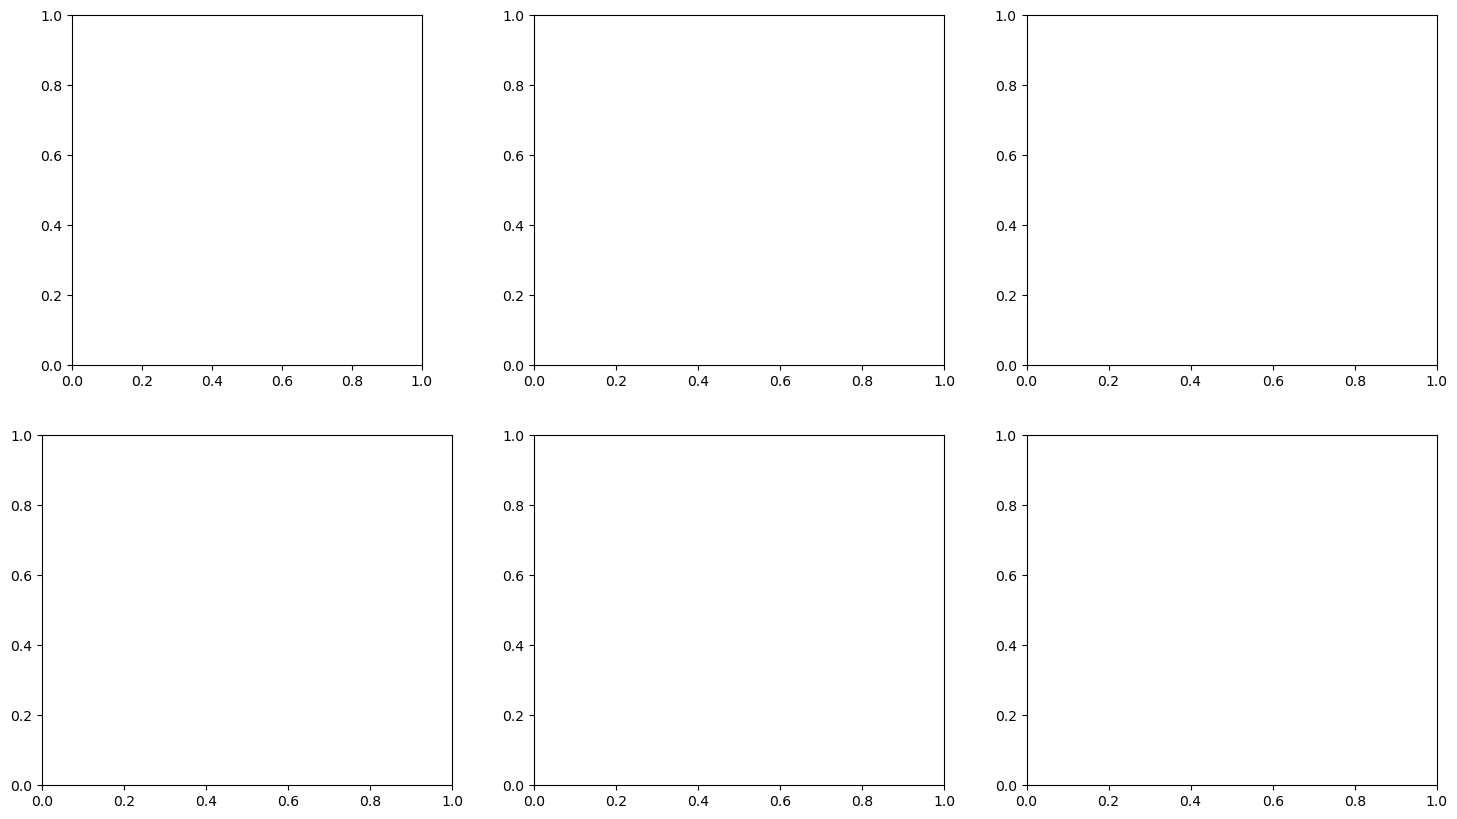

In [21]:
# --- Step 4: WordCloud per Dataset ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, df) in enumerate(processed_dfs.items()):
    text = " ".join(df['cleaned_content'].astype(str).tolist())
    if not text.strip(): text = "kosong"
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].set_title(f"WordCloud: {name}")
    axes[i].axis('off')

plt.tight_layout()
#plt.savefig("step4_wordclouds_per_app.png")
plt.close()

# --- Step 4 (cont): Validation (Lexicon vs Score) ---
# Aggregate all data for validation check
all_df = pd.concat(processed_dfs.values())
cm = confusion_matrix(all_df['score_label'], all_df['lexicon_label'], labels=["Negatif", "Netral", "Positif"])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Netral", "Positif"], yticklabels=["Negatif", "Netral", "Positif"])
plt.title("Validasi Label: Lexicon vs Score (Ground Truth)")
plt.xlabel("Predicted (Lexicon)")
plt.ylabel("Actual (Score)")
#plt.savefig("step4_validation_matrix.png")
plt.close()

# --- Step 6 & 8: Sentiment Counts Visualization ---
# Prepare data for plotting
sentiment_counts = all_df.groupby(['App', 'score_label']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='App', y='Count', hue='score_label', palette={"Positif": "green", "Netral": "gray", "Negatif": "red"})
plt.title("Distribusi Sentimen per Aplikasi")
plt.ylabel("Jumlah Ulasan")
#plt.savefig("step6_sentiment_distribution.png")
plt.close()

# --- Step 6 (cont): WordCloud per Sentiment (Aggregated) ---
# Generating 3 WordClouds (Pos, Neg, Netral)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ["Positif", "Netral", "Negatif"]
colors = ["Greens", "Greys", "Reds"]

for i, sent in enumerate(sentiments):
    text = " ".join(all_df[all_df['score_label'] == sent]['cleaned_content'].astype(str).tolist())
    if not text.strip(): text = "kosong"
    wc = WordCloud(width=800, height=400, background_color='white', colormap=colors[i]).generate(text)

    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f"WordCloud: {sent}")
    axes[i].axis('off')

plt.tight_layout()
#plt.savefig("step6_sentiment_wordclouds.png")
plt.close()

# --- Step 7: N-Gram (4-gram) Visualization ---
def get_top_ngrams(corpus, n=4, k=10):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, df) in enumerate(processed_dfs.items()):
    try:
        top_ngrams = get_top_ngrams(df['cleaned_content'].astype(str), n=4, k=5) # Top 5 to save space
        if top_ngrams:
            x, y = zip(*top_ngrams)
            sns.barplot(x=list(y), y=list(x), ax=axes[i], orient='h', palette='viridis')
        axes[i].set_title(f"Top 4-Grams: {name}")
    except ValueError:
        # Handle cases with not enough text for 4-grams
        axes[i].text(0.5, 0.5, "Not enough data", ha='center')

plt.tight_layout()
#plt.savefig("step7_ngrams.png")
plt.close()

# Print summary for Step 9 (Conclusion)
print("--- Summary Stats for Conclusion ---")
print(all_df.groupby('App')['score_label'].value_counts(normalize=True).unstack())

In [ ]:
# --- 1. Load & Deduplicate Data ---
files = {
    "BCA Mobile": "ulasan_bca.csv",
    "BNI Mobile": "ulasan_bnimobile.csv",
    "Wondr by BNI": "ulasan_bniwondr.csv",
    "BRIMO": "ulasan_brimo.csv",
    "Livin Mandiri": "ulasan_livin.csv",
    "myBCA": "ulasan_mybca.csv"
}

dfs = {}
for name, path in files.items():
    try:
        df = pd.read_csv(path)
        # Deduplicate immediately
        df = df.drop_duplicates(subset=['content', 'userName'], keep='first')
        df['App'] = name
        dfs[name] = df
    except Exception as e:
        print(f"Error loading {name}: {e}")

# --- 2. Preprocessing Setup ---
stopwords_id = set([
    "yang", "dan", "di", "ke", "dari", "ini", "itu", "untuk", "pada", "adalah",
    "sebagai", "dengan", "juga", "karena", "tapi", "tetapi", "namun", "akan",
    "bisa", "ada", "tidak", "sudah", "saya", "kami", "kita", "kamu", "dia",
    "mereka", "anda", "aku", "lagi", "mau", "masih", "apa", "kenapa", "gimana",
    "saja", "kalau", "kalo", "biar", "kok", "mah", "dong", "sih", "nya",
    "bgt", "gak", "gk", "ga", "tp", "yg", "dgn", "sdh", "aja", "sy", "ma",
    "klo", "udh", "udah", "blm", "belum", "bkn", "bukan", "dr", "kl", "jd",
    "jdi", "kpn", "kapan", "krn", "msh", "msih", "sm", "sama", "utk", "untk",
    "dg", "dengn", "tuh", "deh", "kan", "lah", "pun", "kah"
])

slang_dict = {
    "gk": "tidak", "ga": "tidak", "gak": "tidak", "nggak": "tidak",
    "sy": "saya", "aq": "aku", "ak": "aku", "kamu": "anda",
    "bgt": "banget", "bgus": "bagus", "baguus": "bagus",
    "brimo": "bri", "livin": "mandiri", "mobile": "banking",
    "blm": "belum", "tdk": "tidak", "jgn": "jangan",
    "buka": "buka", "bs": "bisa", "bisaa": "bisa",
    "gabisa": "tidak bisa", "gabis": "tidak bisa",
    "eror": "error", "erorr": "error", "errorr": "error",
    "lola": "lambat", "lemot": "lambat", "lelet": "lambat",
    "mntap": "mantap", "mantul": "mantap", "sip": "mantap",
    "ok": "oke", "oke": "baik", "tq": "terima kasih",
    "thanks": "terima kasih", "makasih": "terima kasih",
    "thx": "terima kasih", "trimakasih": "terima kasih",
    "trf": "transfer", "tf": "transfer", "trs": "terus",
    "karna": "karena", "krn": "karena", "mulu": "terus"
}

positive_words = set([
    "bagus", "baik", "mantap", "keren", "mudah", "cepat", "lancar",
    "puas", "suka", "oke", "aman", "membantu", "terbaik", "top", "jos",
    "gampang", "praktis", "memuaskan", "senang", "cinta", "hebat"
])
negative_words = set([
    "jelek", "buruk", "lambat", "susah", "ribet", "kecewa", "parah",
    "gagal", "error", "gangguan", "lelet", "lemot", "sampah", "kapok",
    "sulit", "rugi", "takut", "hilang", "benci", "kesal", "emosi",
    "bodoh", "rusak", "payah", "hancur", "berat"
])

def clean_text(text):
    if not isinstance(text, str): return ""
    text = text.lower()
    words = text.split()
    words = [slang_dict.get(w, w) for w in words]
    text = " ".join(words)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)

    words = text.split()
    cleaned_words = []
    for w in words:
        if w.endswith('lah') and len(w) > 3: w = w[:-3]
        elif w.endswith('kah') and len(w) > 3: w = w[:-3]
        elif w.endswith('tah') and len(w) > 3: w = w[:-3]
        elif w.endswith('pun') and len(w) > 3: w = w[:-3]
        elif w.endswith('nya') and len(w) > 3: w = w[:-3]
        elif w.endswith('ku') and len(w) > 3: w = w[:-2]
        elif w.endswith('mu') and len(w) > 3: w = w[:-2]

        if len(w) <= 3: continue
        if w in stopwords_id: continue
        cleaned_words.append(w)

    return " ".join(cleaned_words)

# Apply Cleaning
processed_dfs = {}
for name, df in dfs.items():
    df = df.copy()
    df['cleaned_content'] = df['content'].apply(clean_text)
    df = df[df['cleaned_content'].str.strip() != ""]
    processed_dfs[name] = df

# Apply Labels
def get_lexicon_label(text):
    words = text.split()
    score = 0
    for w in words:
        if w in positive_words: score += 1
        elif w in negative_words: score -= 1
    if score > 0: return "Positif"
    elif score < 0: return "Negatif"
    else: return "Netral"

def get_score_label(score):
    if score <= 2: return "Negatif"
    elif score == 3: return "Netral"
    else: return "Positif"

for name, df in processed_dfs.items():
    df['lexicon_label'] = df['cleaned_content'].apply(get_lexicon_label)
    df['score_label'] = df['score'].apply(get_score_label)

all_df = pd.concat(processed_dfs.values())

# --- Visualizations ---

# 1. Step 4: WordCloud per App
fig1, axes1 = plt.subplots(2, 3, figsize=(18, 10))
axes1 = axes1.flatten()
for i, (name, df) in enumerate(processed_dfs.items()):
    text = " ".join(df['cleaned_content'].astype(str).tolist())
    if not text.strip(): text = "kosong"
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    axes1[i].imshow(wc, interpolation='bilinear')
    axes1[i].set_title(f"WordCloud: {name}")
    axes1[i].axis('off')
plt.tight_layout()
#plt.savefig("step4_wordclouds_dedup.png")

# 2. Step 4 Validation Matrix
cm = confusion_matrix(all_df['score_label'], all_df['lexicon_label'], labels=["Negatif", "Netral", "Positif"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Netral", "Positif"], yticklabels=["Negatif", "Netral", "Positif"])
plt.title("Validasi Label (Data Bersih)")
plt.ylabel("Actual (Score)")
plt.xlabel("Predicted (Lexicon)")
plt.tight_layout()
#plt.savefig("step4_validation_dedup.png")

# 3. Step 6 Sentiment Distribution
sentiment_counts = all_df.groupby(['App', 'score_label']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='App', y='Count', hue='score_label', palette={"Positif": "green", "Netral": "gray", "Negatif": "red"})
plt.title("Distribusi Sentimen (Data Bersih)")
plt.tight_layout()
#plt.savefig("step6_sentiment_dist_dedup.png")

# 4. Step 6 WordCloud per Sentiment
fig4, axes4 = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ["Positif", "Netral", "Negatif"]
colors = ["Greens", "Greys", "Reds"]
for i, sent in enumerate(sentiments):
    text = " ".join(all_df[all_df['score_label'] == sent]['cleaned_content'].astype(str).tolist())
    if not text.strip(): text = "kosong"
    wc = WordCloud(width=800, height=400, background_color='white', colormap=colors[i]).generate(text)
    axes4[i].imshow(wc, interpolation='bilinear')
    axes4[i].set_title(f"WordCloud: {sent}")
    axes4[i].axis('off')
plt.tight_layout()
#plt.savefig("step6_sentiment_wc_dedup.png")

# 5. Step 7 N-Grams
def get_top_ngrams(corpus, n=4, k=5):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:k]

fig5, axes5 = plt.subplots(2, 3, figsize=(18, 12))
axes5 = axes5.flatten()
for i, (name, df) in enumerate(processed_dfs.items()):
    try:
        top_ngrams = get_top_ngrams(df['cleaned_content'].astype(str), n=4, k=5)
        if top_ngrams:
            x, y = zip(*top_ngrams)
            # Remove legend=False argument
            sns.barplot(x=list(y), y=list(x), ax=axes5[i], orient='h', palette='viridis', hue=list(x))
            if axes5[i].legend_:
                axes5[i].legend_.remove() # Manually remove legend if it exists
        axes5[i].set_title(f"Top 4-Grams: {name}")
    except ValueError:
        axes5[i].text(0.5, 0.5, "Not enough data", ha='center')
plt.tight_layout()
#plt.savefig("step7_ngrams_dedup.png")

# Stats
print("--- Sentiment % Summary (Deduplicated) ---")
print(all_df.groupby('App')['score_label'].value_counts(normalize=True).unstack())